In [1]:
import matplotlib.pyplot as plt
from dgf import DualPopulation
import numpy as np
import pandas as pd
data = pd.read_hdf("prob_df_draco_c.hdf")
fitter = DualPopulation([.5, -300, 50, 90, 100], data.HRV, data.dHRV)

# theta_0 keys
        # pgal
        # gal_hrv
        # gal_vsig
        # mw_hrv
        # mw_vsig
theta = [.8, -290, 90, -90, 100]

Optimization terminated successfully.
[   0.67748416 -289.86317435    3.09645722 -114.66785942  116.66445977]


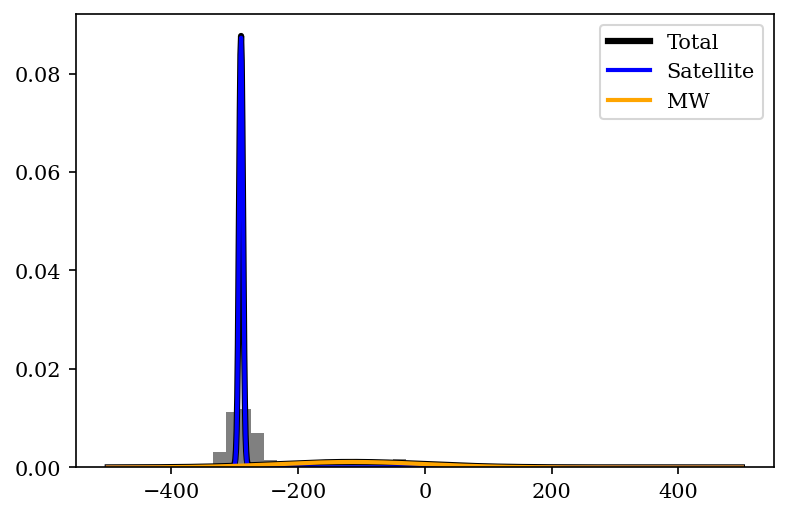

In [2]:
popt = fitter.getOptimalValues(theta)
print(popt)
fitter.project_model(popt, rvmin=-500, rvmax=500)

In [3]:
fitter.run(20, popt)

100%|██████████| 5000/5000 [01:25<00:00, 58.52it/s]


(array([[ 7.08702683e-01, -2.90361926e+02,  9.30753205e+00,
         -1.11203863e+02,  1.20996880e+02],
        [ 6.89635883e-01, -2.89390630e+02,  1.36535474e-01,
         -1.04858317e+02,  1.11226670e+02],
        [ 7.06249892e-01, -2.89311631e+02,  5.18992199e-01,
         -1.18383842e+02,  1.18600338e+02],
        [ 6.91844192e-01, -2.89474522e+02,  2.41100186e-01,
         -1.06291245e+02,  1.08460971e+02],
        [ 6.37006220e-01, -2.90663142e+02,  6.75098993e+00,
         -1.32361982e+02,  1.16615139e+02],
        [ 6.74436858e-01, -2.87698509e+02,  2.51536753e+00,
         -1.26390095e+02,  1.13458144e+02],
        [ 6.30218811e-01, -2.90870106e+02,  5.29536840e+00,
         -1.10738573e+02,  1.30299199e+02],
        [ 7.04786640e-01, -2.89608001e+02,  2.56724192e+00,
         -1.09798609e+02,  1.13497138e+02],
        [ 6.99966952e-01, -2.90288810e+02,  3.12314451e+00,
         -1.21354804e+02,  1.24192698e+02],
        [ 6.83577018e-01, -2.89119011e+02,  7.71463142e+00,
    

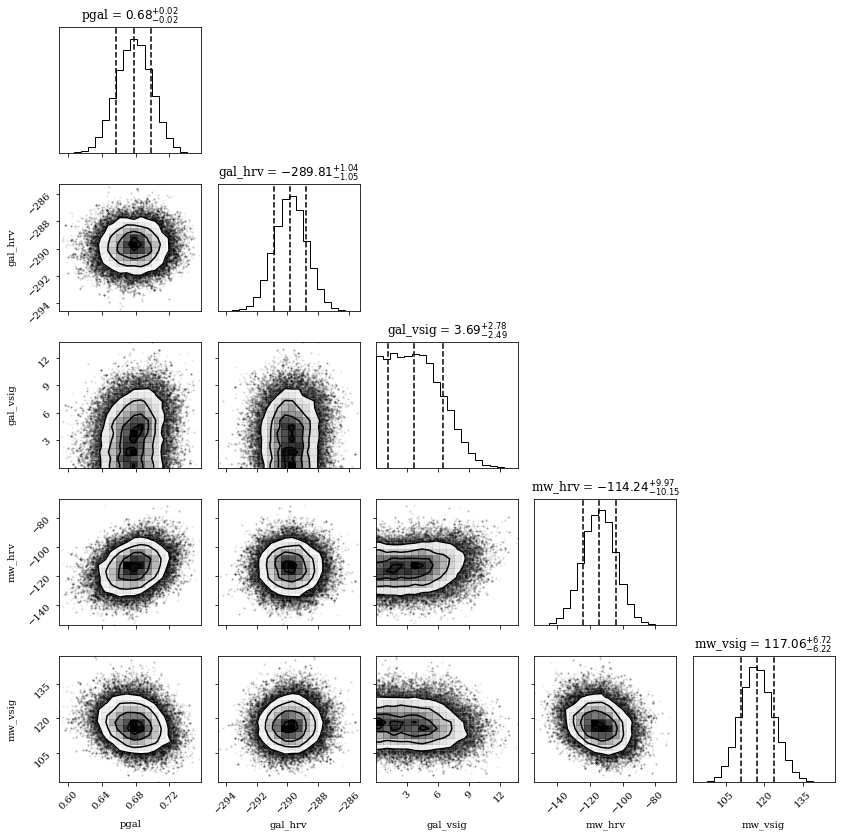

In [4]:
fitter.plot()

In [6]:
fitter.get_results()

{'pgal': 0.6782763634324228,
 'hrv_gal': -289.81399322724127,
 'vsig_gal': 3.6876906531130524,
 'hrv_mw': -114.2389672357554,
 'vsig_mw': 117.05601582929444}

In [9]:
fitter.pdf([-269])

array([1.30780826e-08])

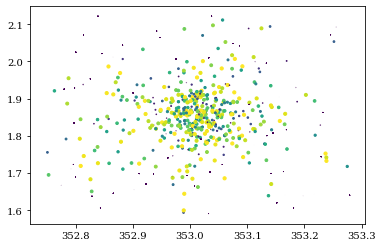

In [24]:
from scipy.stats import norm
fig, ax = plt.subplots()
arr = norm.pdf(
            data["HRV"], loc=fitter.results["hrv_gal"], scale=5*fitter.results["vsig_gal"]
        )
ax.scatter(data["RA"], data["DEC"], c=arr/np.max(arr), s=arr/np.max(arr)*10)
plt.show()